#PUBG

Os videogames do estilo Battle Royale conquistaram o mundo. 100 jogadores são distribuídos em uma ilha de mãos vazias e devem explorar, eliminar e eliminar outros jogadores até que apenas um fique de pé, enquanto a zona de jogo continua encolhendo. Este dataset contém uma coleção de dados de jogadores anônimos disponibilizado pela equipe do PUBG, o objetivo é prever a colocação final dos jogadores.



## Variáveis



* **DBNOs** - Número de jogadores inimigos derrubados.
* **assists** - Número de jogadores inimigos que um jogador inferiu dano e que foram mortos por companheiros posteriormente.
* **boosts** - Número de itens de reforço usados.
* **damageDealt** - Dano total causado. Nota: O dano auto infligido é subtraído.
* **headshotKills** - Número de jogadores inimigos mortos com headshots.
* **heals** - Número de itens de cura usados.
* **Id** - Id do jogador
* **killPlace** - Ranking do número de jogadores inimigos mortos.
* **killPoints** - Classificação externa do jogador com base em mortes. (Pense nisso como um ranking Elo onde somente as mortes importam.) Se houver um valor diferente de -1 em rankPoints, então qualquer 0 em killPoints deve ser tratado como um "Nenhum".
* **killStreaks** - Número máximo de jogadores inimigos mortos em um curto período de tempo.
* **kills** - Número de jogadores inimigos mortos.
* **longestKill** - Maior distância entre jogador e jogador morto na hora da morte. Nota: isso pode ser enganoso, já que derrubar um jogador e ir embora pode levar a um status maior e mais longo.
* **matchDuration** - Duração da partida em segundos.
* **matchId** - ID para identificar correspondência. 
* **matchType** - String identificando o modo de jogo. Os modos padrão são “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp” e “squad-fpp”; outros modos são de eventos ou correspondências personalizadas.
* **rankPoints** - Elo ranking do jogador. Nota: essa classificação é inconsistente e está sendo reprovada na próxima versão da API. Valor de -1 ocorre de "Nenhum".
* **revives** - Número de vezes que este jogador reviveu seus companheiros de equipe.
* **rideDistance** - Distância total percorrida em veículos medidos em metros.
* **roadKills** - Número de mortes em um veículo.
* **swimDistance** - Distância total percorrida nadando, medida em metros.
* **teamKills** - Número de vezes que este jogador matou um colega de equipe.
* **vehicleDestroys** - Número de veículos destruídos.
* **walkDistance** - Distância total percorrida a pé, medida em metros.
* **weaponsAcquired** - Número de armas coletadas.
* **winPoints** - ranking externo baseado nas vitórias do jogador. (Pense nisso como um ranking Elo onde somente ganhar ganha.) Se houver um valor diferente de -1 em rankPoints, então qualquer 0 em winPoints deve ser tratado como um "Nenhum".
* **groupId** - ID para identificar um grupo dentro de uma correspondência. Se o mesmo grupo de jogadores jogar em partidas diferentes, eles terão um groupId diferente a cada vez.
* **numGroups** - Número de grupos para os quais temos dados na partida.
* **maxPlace** - Pior colocação para a qual temos dados na partida. Isso pode não corresponder a numGroups, pois às vezes os dados ignoram as veiculações.
* **winPlacePerc** - O alvo da previsão. Esta é uma colocação vencedora percentil, em que 1 corresponde ao 1º lugar e 0 corresponde ao último lugar da partida. Ele é calculado fora de maxPlace, não numGroups, portanto, é possível ter pedaços faltando em uma correspondência.



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy
import warnings
warnings.filterwarnings("ignore")

In [0]:
train = pd.read_csv('/content/gdrive/My Drive/Data Science/PUBG/train_V2.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [0]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


## Número de mortes

In [0]:
train['kills'].mean()

0.9247833241810259

In [0]:
train['kills'].quantile(0.99)

7.0

In [0]:
train['kills'].max()

72

A média dos jogadores tem menos de 1 morte, enquanto 99% deles tem ao menos 7. Equanto isso o jogador no dataset que mais matou, tem 72 mortes. 

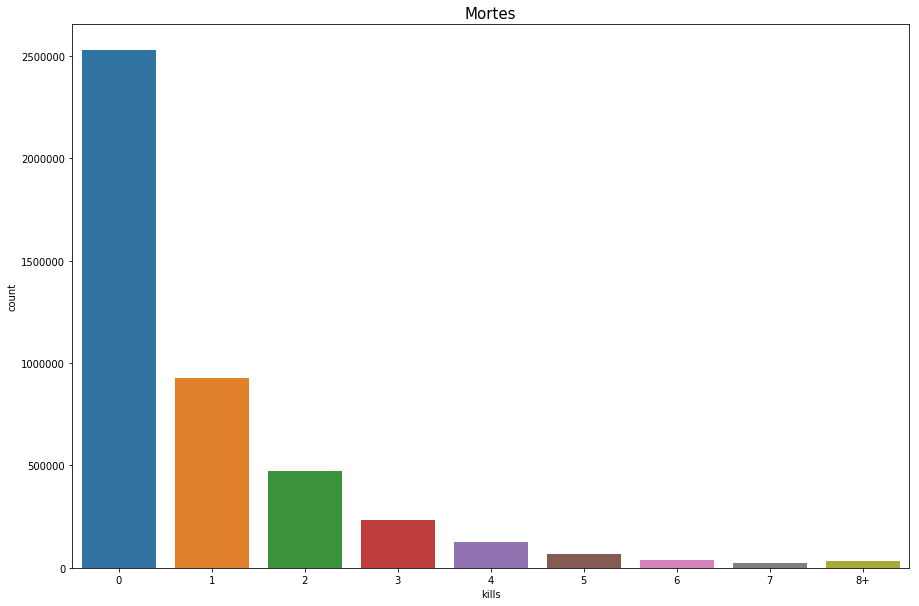

In [0]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Mortes",fontsize=15)
plt.show()

###Relação entre mortes e classificação do jogador

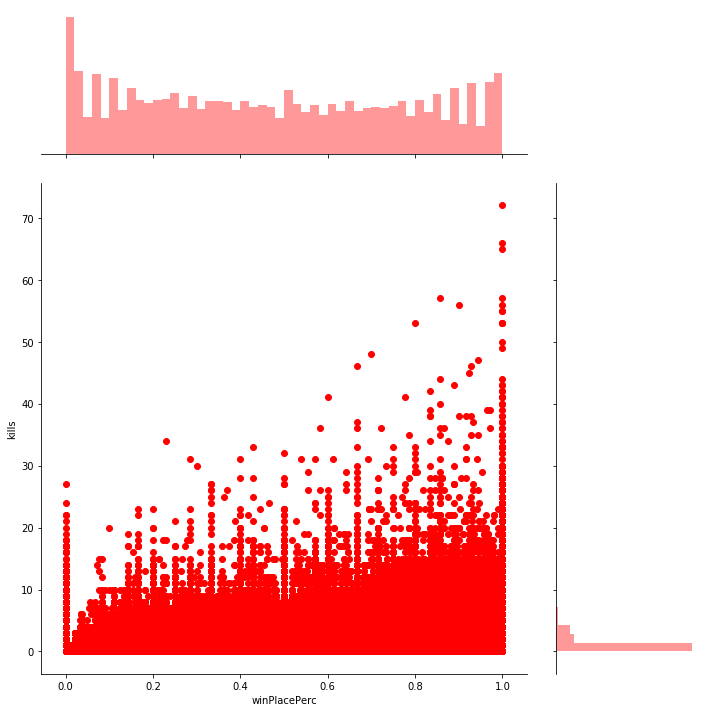

In [0]:
sns.jointplot(x="winPlacePerc", y="kills", data=train, height=10, ratio=3, color="r")
plt.show()

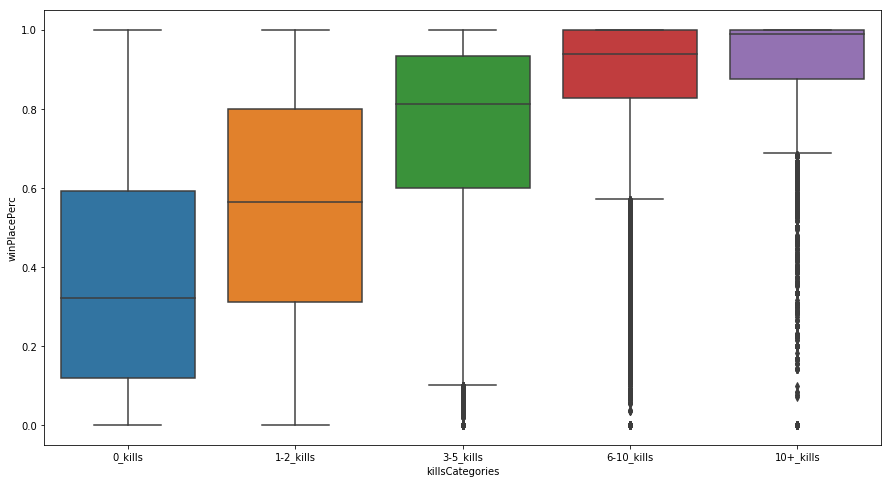

In [0]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

Evidentemente o número de mortes tem uma relação considerável com a classificação do jogador. 

## Analisando distâncias percorridas

In [0]:
train['walkDistance'].mean()

1154.217859096256

In [0]:
train['walkDistance'].quantile(0.99)

4396.0

In [0]:
train['walkDistance'].max()

25780.0

Em média, os jogadores andam 1154,2 metros, sendo que 99% caminham no máximo 4396 m. Enquanto que o indivíduo que mais andou, andou impressionantes 25780 m.

In [0]:
data = train.copy()
len(data[data['walkDistance'] == 0])

99603

99603 jogadores andaram 0 m. Estes morreram antes de dar o primeiro passo, ou mais provavelmente ficaram inativos.

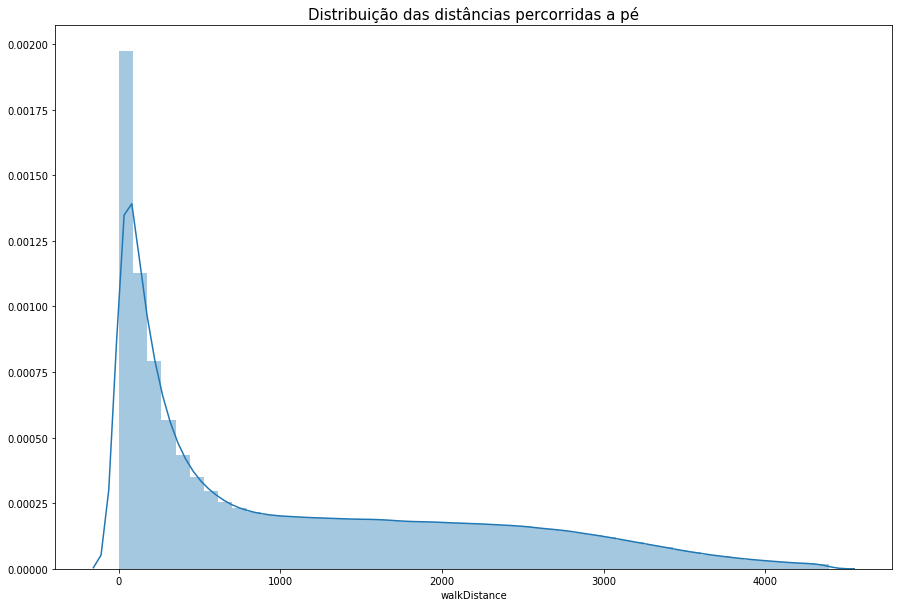

In [0]:
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Distribuição das distâncias percorridas a pé",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

### Veículos

In [0]:
train['rideDistance'].mean()

606.1156691540683

In [0]:
train['rideDistance'].quantile(0.99)

6966.0

In [0]:
train['rideDistance'].max()

40710.0

Em média, os jogadores dirigiram 606,1 metros, sendo que 99% fizeram no máximo 6966 m. Enquanto o indivíduo que mais dirigiu, fez isso por 40710 m. 

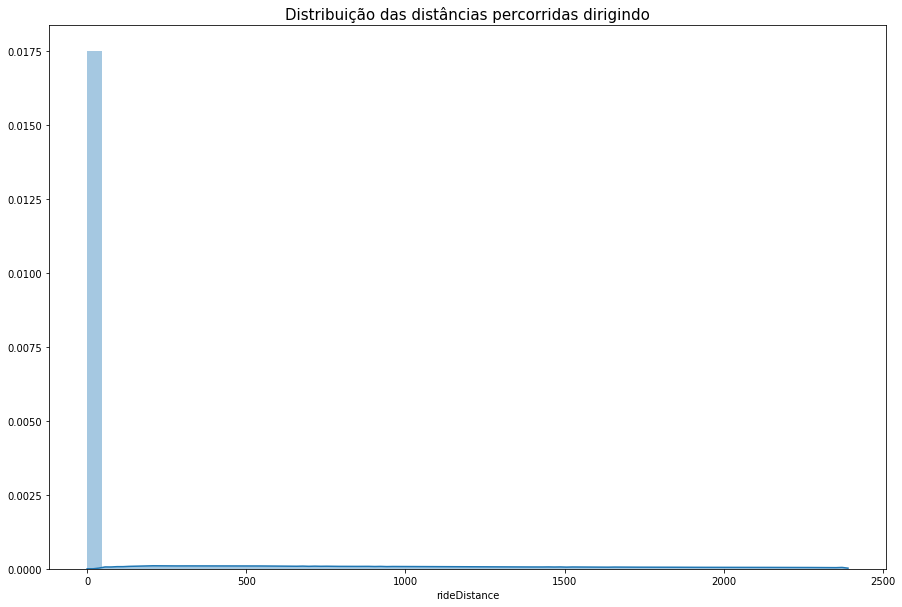

In [0]:
data = train.copy()
data = data[data['rideDistance'] < train['rideDistance'].quantile(0.9)]
plt.figure(figsize=(15,10))
plt.title("Distribuição das distâncias percorridas dirigindo",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

In [0]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train, height=10, ratio=3, color="lime")
plt.show()

Aparentemente a distância percorrida pelo jogador tem uma correlação relevante com a variável alvo. Isso fácil de entender, já que os melhores colocados sobrevivem por mais tempo e consequentemente andam por mais tempo.

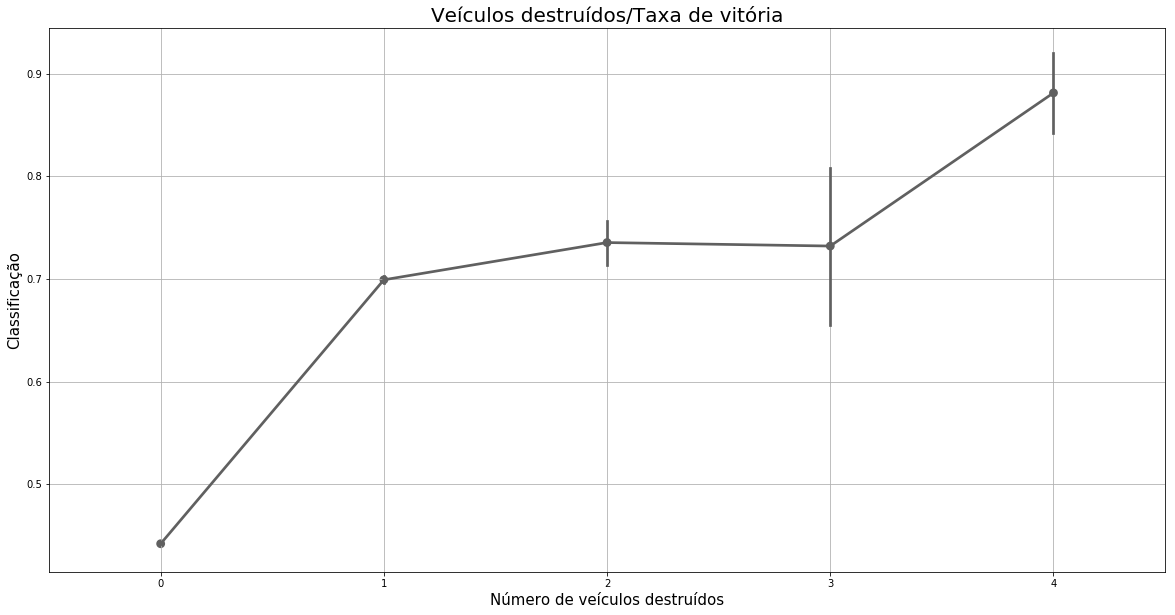

In [0]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Número de veículos destruídos',fontsize = 15,color='black')
plt.ylabel('Classificação',fontsize = 15,color='black')
plt.title('Veículos destruídos/Taxa de vitória',fontsize = 20,color='black')
plt.grid()
plt.show()

Como podemos ver, o número de veículos destruídos está bem relacionado com a classificação final. Este número nos mostra bem mais do que apenas o total de veículos destruídos, mas também a habilidade do jogador. Já que conseguir aumentar esse número não é uma tarefa simples como pode parecer.

### Natação

In [0]:
train['swimDistance'].mean()

4.509322451307294

In [0]:
train['swimDistance'].quantile(0.99)

123.0

In [0]:
train['swimDistance'].max()

3823.0

Os jogadores em média nadam por 4.5 m, sendo que 99% deles nadam até 123 m. Enquanto o que mais nadou, fez isso por 3823 m, haja fôlego. 

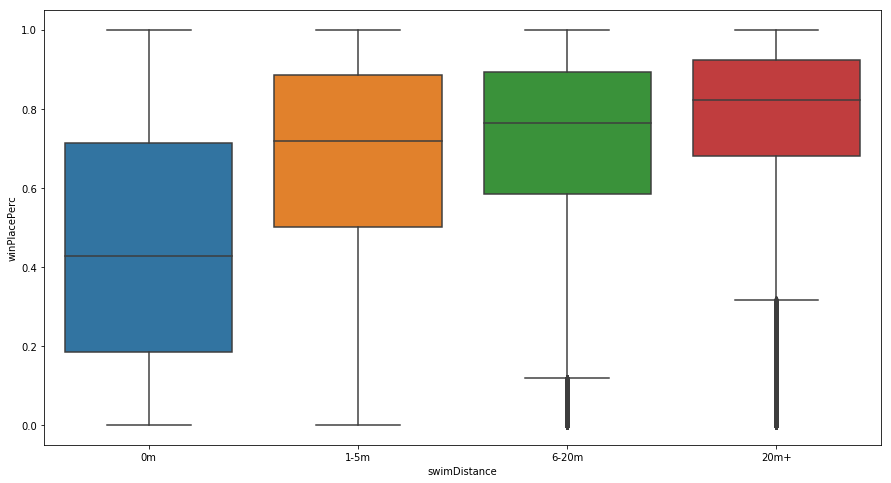

In [0]:
swim = train.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()

É notória a diferença causada pela distância que foi percorrida nadando. Utilizando a mesma hipótese levantada na análise da distância percorrida a pé, esses valores estão assim associados graças ao maior tempo em que os jogadores melhores colocados tem para realizar a atividade, já que ao longo do jogo pode ser necessário superar obstáculos mais facilmente nadando. 

No entanto deve ser levado em consideração os mapas que podem conter muito pouca água, tendo isso em vista, seria possível fazer uma análise mais profunda relacionando, além da distância nadada, o mapa.

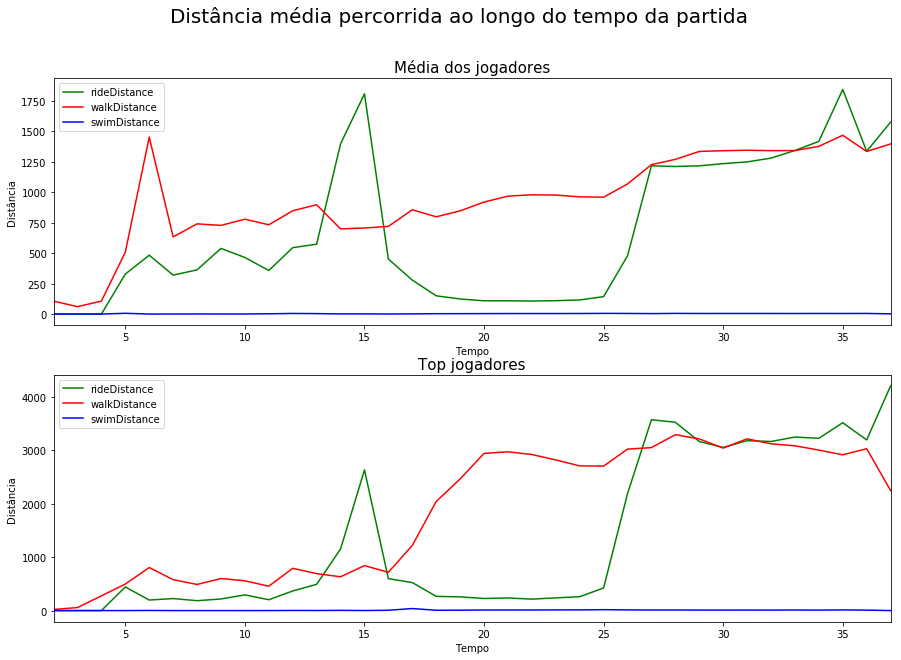

In [0]:
def sec_to_min(sec):
    return sec//60
  
def mean_of_each_minute(data,column):
    new_data = data.groupby('minutes')[column].mean().reset_index()
    return new_data

first = train['winPlacePerc'] == 1
better_players = train[first]
  
cond = train['walkDistance'] > 0
cond2 = train['winPlacePerc'] != 1
dist_analysis = train[cond & cond2]
dist_analysis['minutes'] = dist_analysis['matchDuration'].apply(sec_to_min)
better_players['minutes'] = better_players['matchDuration'].apply(sec_to_min)

ride_distance = mean_of_each_minute(dist_analysis,'rideDistance')
walk_distance = mean_of_each_minute(dist_analysis,'walkDistance')
swim_distance = mean_of_each_minute(dist_analysis,'swimDistance')

better_ride_distance = mean_of_each_minute(better_players,'rideDistance')
better_walk_distance = mean_of_each_minute(better_players,'walkDistance')
better_swim_distance = mean_of_each_minute(better_players,'swimDistance')

fig,ax=plt.subplots(nrows=2,figsize=(15,10))

ride_distance.plot(kind='line',x='minutes',y='rideDistance',ax=ax[0],color='green')
walk_distance.plot(kind='line',x='minutes',y='walkDistance',ax=ax[0],color='red')
swim_distance.plot(kind='line',x='minutes',y='swimDistance',ax=ax[0],color='blue')

better_ride_distance.plot(kind='line',x='minutes',y='rideDistance',ax=ax[1],color='green')
better_walk_distance.plot(kind='line',x='minutes',y='walkDistance',ax=ax[1],color='red')
better_swim_distance.plot(kind='line',x='minutes',y='swimDistance',ax=ax[1],color='blue')

fig.suptitle('Distância média percorrida ao longo do tempo da partida',fontsize=20)
ax[0].set_title('Média dos jogadores',fontsize=15)
ax[0].set_xlabel('Tempo')
ax[0].set_ylabel('Distância')
ax[1].set_title('Top jogadores',fontsize=15)
ax[1].set_xlabel('Tempo')
ax[1].set_ylabel('Distância')
plt.show()

De uma maneira geral os padrões de comportamento são semelhantes. Mas olhando mais cuidadosamente, vemos que ao chegar próximo do fim da partida os melhores jogadores diminuem a distância percorrida a pé, ao contrário do que acontece com o restante. Provavelmente essa é uma estratégia comum utilizada por jogadores que costumam ficar na primeira colocação, e intuitivamente diminuindo a movimentação diminui também a probabilidade de ser detectado por um inimigo.

## Itens

In [0]:
train['heals'].mean()

1.370147196987789

In [0]:
train['heals'].quantile(0.99)

12.0

In [0]:
train['boosts'].mean()

1.1069077209045448

In [0]:
train['boosts'].quantile(0.99)

7.0

O jogadores utilizam em média 1.4 itens de regeneração e 1.1 de boost, enquanto deles 99% utilizam no máximo 12 itens de regeneração e 7 de boost.

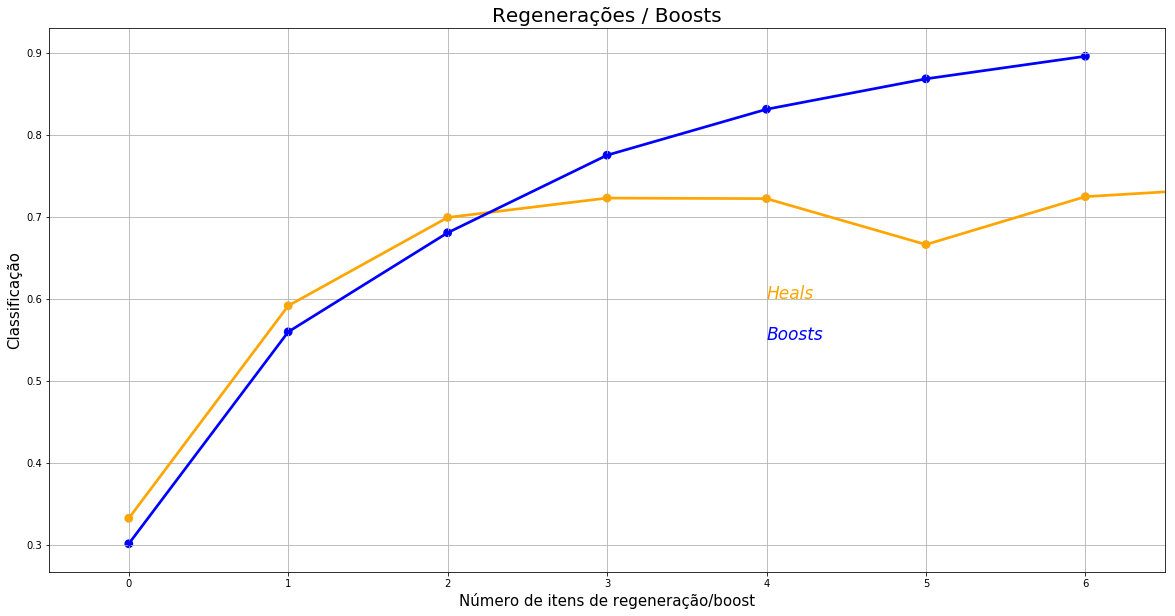

In [0]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='orange',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='orange',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Número de itens de regeneração/boost',fontsize = 15,color='black')
plt.ylabel('Classificação',fontsize = 15,color='black')
plt.title('Regenerações / Boosts',fontsize = 20,color='black')
plt.grid()
plt.show()

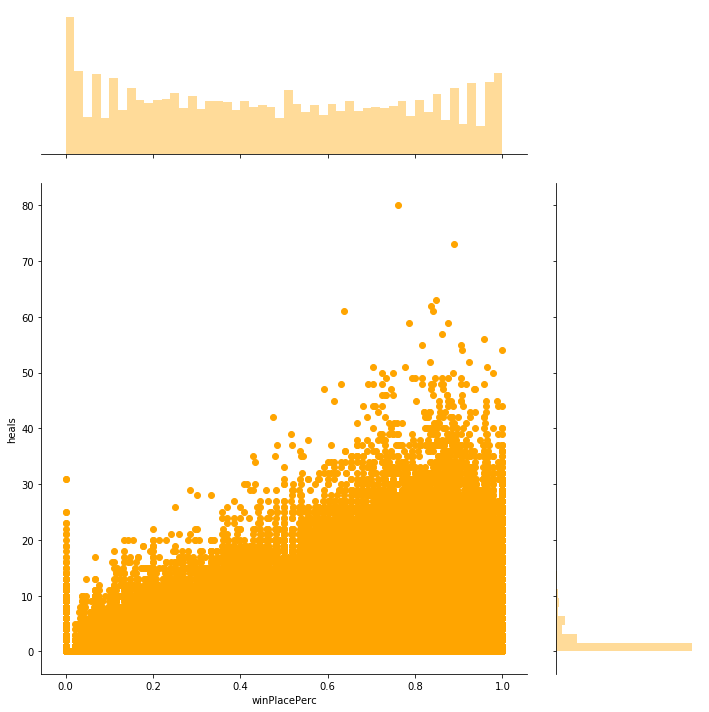

In [0]:
sns.jointplot(x="winPlacePerc", y="heals", data=train, height=10, ratio=3, color="orange")
plt.show()

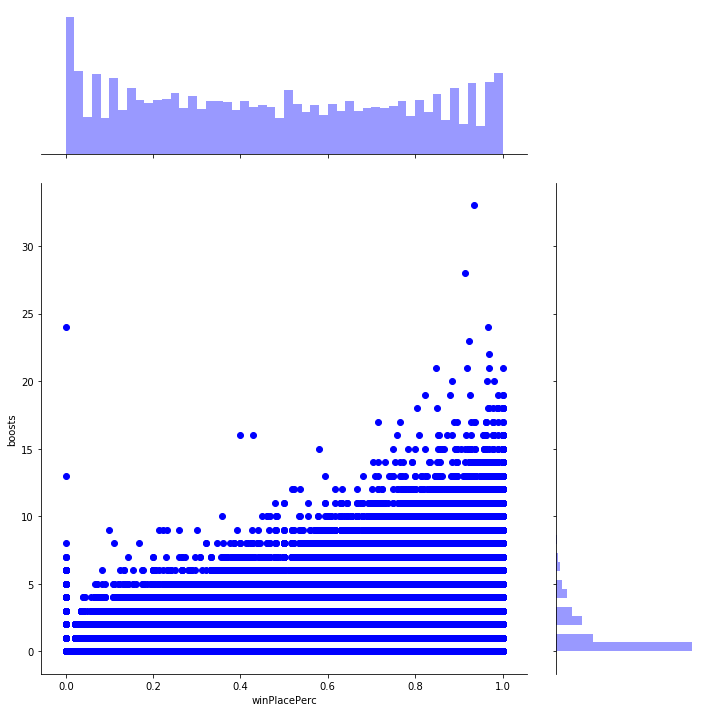

In [0]:
sns.jointplot(x="winPlacePerc", y="boosts", data=train, height=10, ratio=3, color="blue")
plt.show()

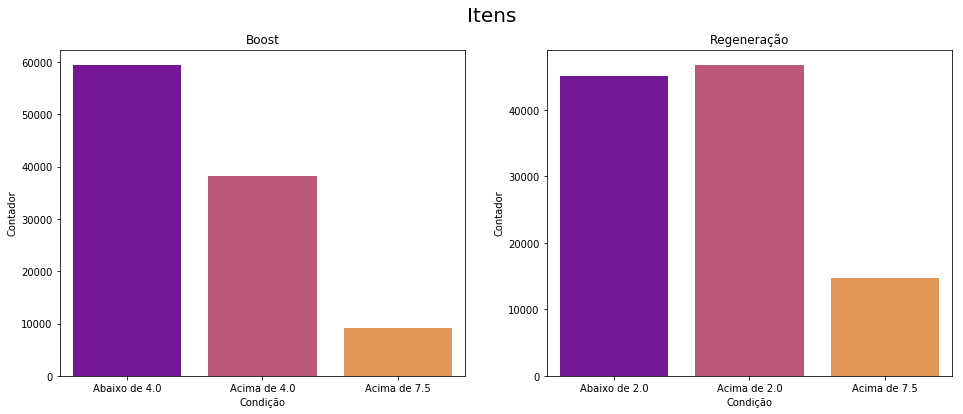

In [0]:
def item_analyzer(item_type):    
    seventy_five = np.percentile(better_players[item_type],75)
    mean = np.percentile(better_players[item_type],50)
    upper_bound = seventy_five * 1.5
    cond1 = better_players[item_type] < mean
    cond2 = better_players[item_type] > mean
    cond3 = better_players[item_type] < upper_bound
    cond4 = better_players[item_type] > upper_bound
    below_mean = better_players[cond1][item_type].count()
    above_mean = better_players[cond2 & cond3][item_type].count()
    above_upper_bound = better_players[cond4][item_type].count()
    test = pd.DataFrame({'Condição':['Abaixo de '+str(mean),'Acima de '+str(mean),'Acima de '+str(upper_bound)],
                         'Contador':[below_mean,above_mean,above_upper_bound]})
    return test

  
boost = item_analyzer('boosts')
heal = item_analyzer('heals')
items = [boost,heal]
col=0
fig,ax=plt.subplots(ncols=2,figsize=(16,6))
for item in items:
    sns.barplot('Condição',y='Contador',data=item,ax=ax[col],palette='plasma')
    col+=1
ax[0].set_title('Boost')
ax[1].set_title('Regeneração')
fig.suptitle('Itens',fontsize=20)
plt.show()

Esses gráficos são suficientes para que possamos perceber a correlação entre a classificação do jogador e o número de itens que o mesmo utilizou, principalmente se o item for de boost.

## Modo do jogo

In [0]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]

In [0]:
len(solos)/len(train) * 100

15.945950564946978

In [0]:
len(duos)/len(train) * 100

74.10279278051597

In [0]:
len(squads)/len(train) * 100

9.951256654537048

In [0]:
No dataset 15,9% dos dados são de jogadores que jogaram sozinhos.
74,1% de jogadores que estavam em duplas.
9,95% de jogadores que perteciam a um esquadrão.

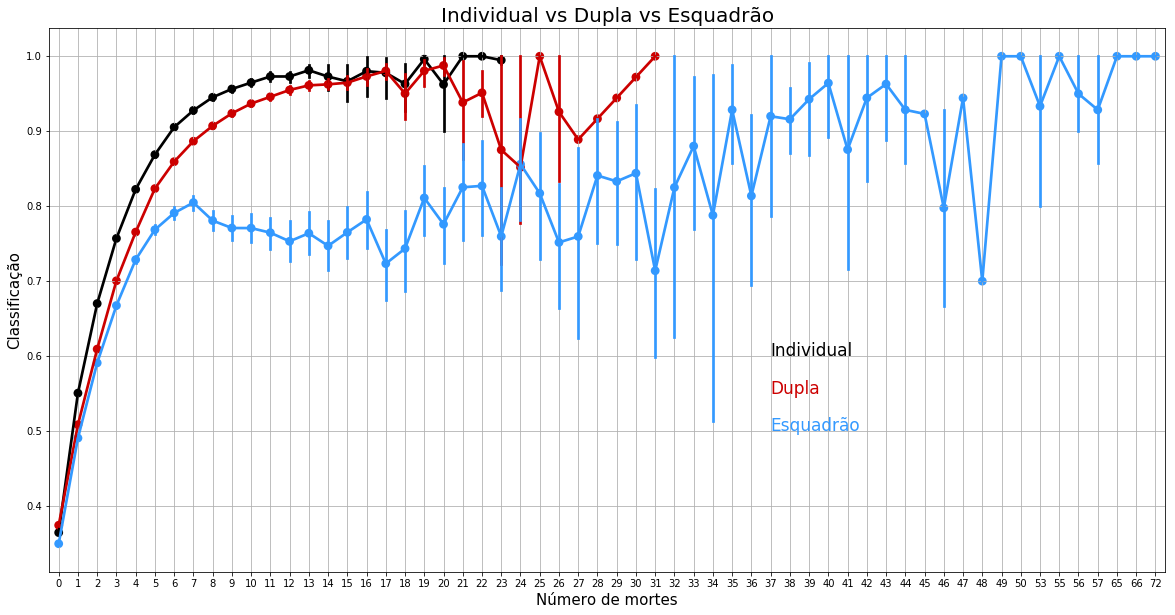

In [0]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Individual',color='black',fontsize = 17)
plt.text(37,0.55,'Dupla',color='#CC0000',fontsize = 17)
plt.text(37,0.5,'Esquadrão',color='#3399FF',fontsize = 17)
plt.xlabel('Número de mortes',fontsize = 15,color='black')
plt.ylabel('Classificação',fontsize = 15,color='black')
plt.title('Individual vs Dupla vs Esquadrão',fontsize = 20,color='black')
plt.grid()
plt.show()

Jogadores individuáis e em dupla se comportam de forma muito semelhante, e ambos diferem muito dos dados de jogadores que pertencem a um esquadrão. De certa forma, podemos dizer que a relação do número de mortes com a classificação é mais importante quando a partida está sendo jogada individualmente ou em dupla.

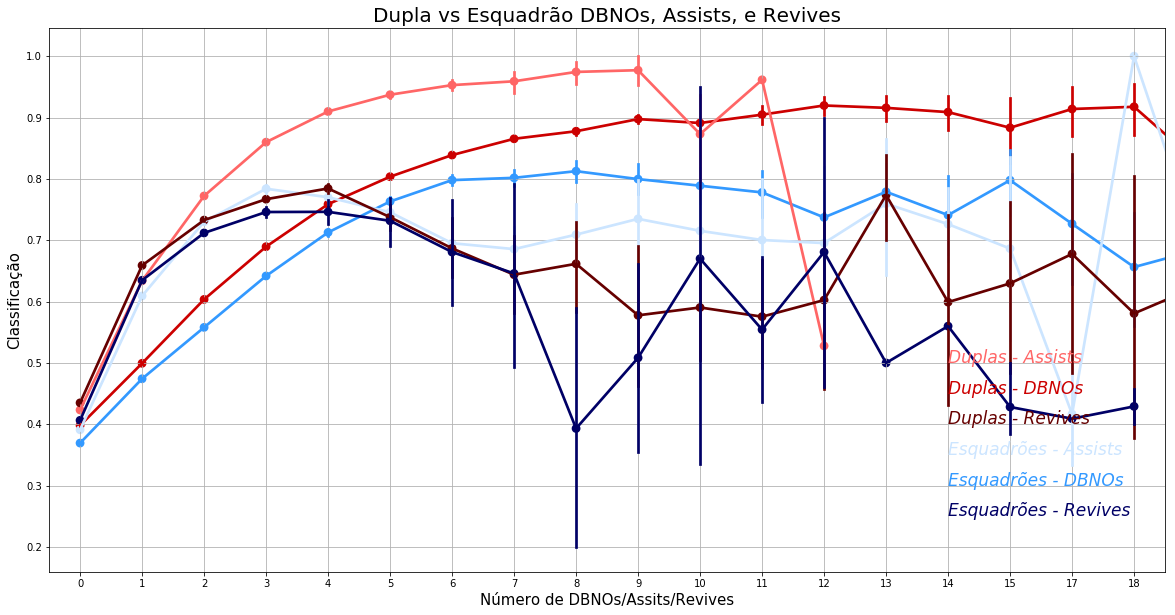

In [0]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='DBNOs',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='DBNOs',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=duos,color='#FF6666',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=squads,color='#CCE5FF',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=duos,color='#660000',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=squads,color='#000066',alpha=0.8)
plt.text(14,0.5,'Duplas - Assists',color='#FF6666',fontsize = 17,style = 'italic')
plt.text(14,0.45,'Duplas - DBNOs',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(14,0.4,'Duplas - Revives',color='#660000',fontsize = 17,style = 'italic')
plt.text(14,0.35,'Esquadrões - Assists',color='#CCE5FF',fontsize = 17,style = 'italic')
plt.text(14,0.3,'Esquadrões - DBNOs',color='#3399FF',fontsize = 17,style = 'italic')
plt.text(14,0.25,'Esquadrões - Revives',color='#000066',fontsize = 17,style = 'italic')
plt.xlabel('Número de DBNOs/Assits/Revives',fontsize = 15,color='black')
plt.ylabel('Classificação',fontsize = 15,color='black')
plt.title('Dupla vs Esquadrão DBNOs, Assists, e Revives',fontsize = 20,color='black')
plt.grid()
plt.show()

DBNOs é o número de inimigos eliminados. Um nocaute acontece apenas em duplas ou esquadrões, já que os companheiros de equipe têm a chance de ressuscitar o jogador derrubado em um determinado momento. Assim, um jogador nocauteado pode ser revivido ou morrer.

O atributo assist também só pode acontecer apenas em duplas ou esquadrões. Significa que o jogador teve um envolvimento em uma morte.

O padrão de comportamento desses dados são semelhantes, a única diferença significativa são as assistências.

## Correlação 

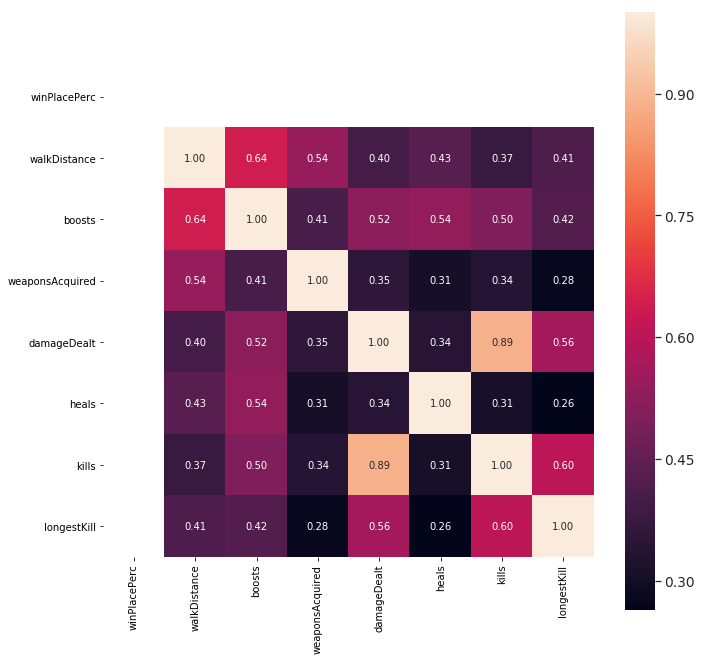

In [0]:
k = 8 
f,ax = plt.subplots(figsize=(11, 11))
cols = train.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Plotar a correlação de todas as variáveis poderia ser confuso, já que são muitas. Esse gráfico mostra as variáveis mais correlacionadas com a variável alvo, e como elas estão relacionadas entre si.

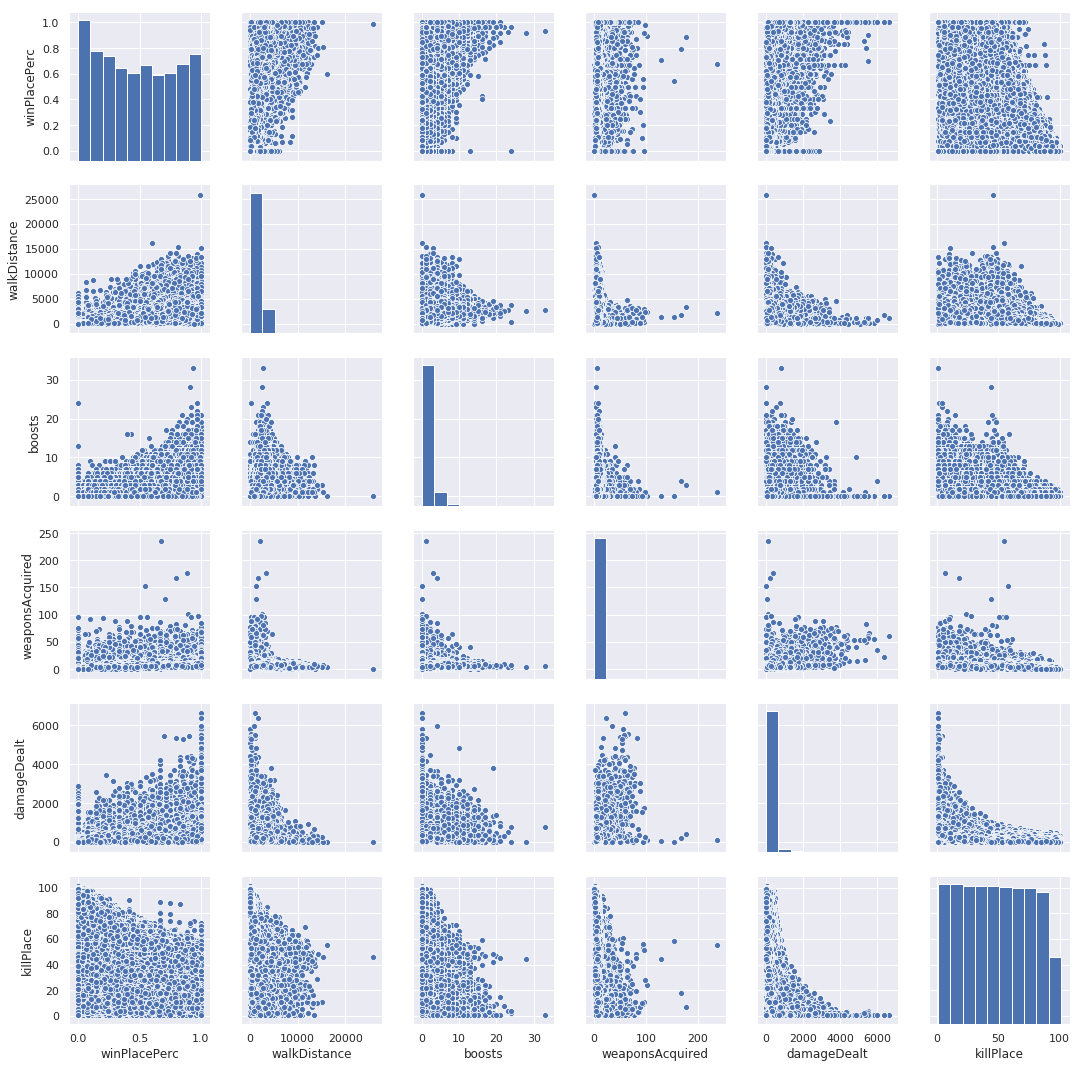

In [0]:
sns.set()
cols = ['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'killPlace']
sns.pairplot(train[cols], size = 2.5)
plt.show()

## Feature Engineering

Baseado nessas análises podemos criar algumas outras variáveis para impulsionar um futuro modelo.
Um dado importante a ser considerado que auxiliará na criação de novas features, é o número de jogadores em cada partida.

In [0]:
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')

In [0]:
train['killsNorm'] = train['kills']*((100-train['playersJoined'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersJoined'])/100 + 1)
train[['playersJoined', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm']][5:8]

,playersJoined,kills,killsNorm,damageDealt,damageDealtNorm
5,95,1,1.05,100.000,105.00000
6,97,0,0.00,0.000,0.00000
7,96,0,0.00,8.538,8.87952


Como foi citado anteriormente, a normalização dos dados em relação ao número de jogadores na partida pode ser uma artefato fundamental. O objetivo das features acima é quantificar as mortes considerando o número de jogadores, já que é razoável pensar que quanto mais jogadores presentes maior também será a chance de matar alguém.


---



In [0]:
train['healsAndBoosts'] = train['heals']+train['boosts']
train['totalDistance'] = train['walkDistance']+train['rideDistance']+train['swimDistance']

,walkDistance,boosts,boostsPerWalkDistance,heals,healsPerWalkDistance,healsAndBoosts,healsAndBoostsPerWalkDistance
40,327.30,1,0.003046,1,0.003046,2,0.006092
41,128.80,0,0.000000,0,0.000000,0,0.000000
42,52.52,0,0.000000,0,0.000000,0,0.000000
43,534.10,1,0.001869,0,0.000000,1,0.001869
44,2576.00,4,0.001552,6,0.002328,10,0.003880


A primeira, unifica a quantidade de itens de regeneração e de boost, e a segunda representa a distância total percorrida pelo jogador.


---



In [0]:
train['killsPerWalkDistance'] = train['kills']/(train['walkDistance']+1)
train['killsPerWalkDistance'].fillna(0, inplace=True)
train[['kills', 'walkDistance', 'rideDistance', 'killsPerWalkDistance', 'winPlacePerc']].tail(10)

,kills,walkDistance,rideDistance,killsPerWalkDistance,winPlacePerc
4446956,0,828.30,0.0,0.000000,0.1071
4446957,1,363.70,0.0,0.002742,0.4583
4446958,0,0.00,0.0,0.000000,0.0000
4446959,0,40.25,0.0,0.000000,0.0842
4446960,4,845.60,180.4,0.004725,0.2414
4446961,0,1019.00,1292.0,0.000000,0.1786
4446962,0,81.70,0.0,0.000000,0.2935
4446963,0,788.70,0.0,0.000000,0.4815
4446964,2,2748.00,0.0,0.000728,0.8000
4446965,2,1244.00,1369.0,0.001606,0.5464


Esta, relaciona a distância percorrida a pé com o número de mortes. 

In [0]:
train['team'] = [1 if i>50 else 2 if (i>25 & i<=50) else 4 for i in train['numGroups']]

In [0]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,healsAndBoosts,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,healsAndBoostsPerWalkDistance,killsPerWalkDistance,team
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96,0.00,0.0000,0,244.8000,0.0,0.0,0.0,0.000000,2
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91,0.00,99.7023,0,1445.0445,0.0,0.0,0.0,0.000000,4
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98,0.00,69.3600,0,161.8000,0.0,0.0,0.0,0.000000,2
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91,0.00,35.8610,0,202.7000,0.0,0.0,0.0,0.000000,2
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97,1.03,103.0000,0,49.7500,0.0,0.0,0.0,0.019704,1


Estes são exemplos de features que podem se adicionadas ao modelo.

### Outras features
Outras features podem ser tão ou mais importantes do que as existentes, aumentando muito a capacidade de decisão dos futuros modelos:


* teamwork: número de vezes em que realizou um trabalho em equipe: assists + revives
* inactive: flag para identificar jogadores inativos, estes são facilmente identificáveis pela distância percorrida. Mas é possível levar em conta ainda outros fatores.
* headshots_kill: taxa de tiros acertados na cabeça do inimigo, assim como o número de veículos destruídos é uma forma de inferir a habilidade do jogador.
* players_in_team: o número de jogadores em um esquadrão pode significar o quão vulnerável uma equipe está em relação a outra com mais jogadores.
* team_percentage: a porcentagem do time em relação ao número máximo possível. Assim como a anterior demonstra a fragilidade da equipe em relação às demais.
* count_knocked: número de vezes que o jogador sofreu um nocaute e precisou de ajuda. Como citado nas seções anteriores, a cada nocaute ficará mais difícil receber ajuda.

